***Import Libraries***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import sqrt

***Drive Connect***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Load Data***

In [ ]:
trainData = np.loadtxt('/content/drive/MyDrive/Data/Pattern/train_knn.txt',delimiter=",",dtype='int32')
print('Train Data')
for x in trainData:
    print("x = ",x[0],"y = ",x[1],"class = ",x[2])

testData = np.loadtxt('/content/drive/MyDrive/Data/Pattern/test_knn.txt',delimiter=",",dtype='int32')
print('\n\nTest Data:')
for x in testData:
    print('x=',x[0],'y=',x[1])

Train Data
x =  7 y =  7 class =  1
x =  7 y =  4 class =  1
x =  6 y =  4 class =  1
x =  7 y =  5 class =  1
x =  7 y =  6 class =  1
x =  6 y =  7 class =  1
x =  6 y =  6 class =  1
x =  3 y =  4 class =  2
x =  2 y =  3 class =  2
x =  3 y =  2 class =  2
x =  4 y =  3 class =  2
x =  3 y =  3 class =  2
x =  4 y =  4 class =  2
x =  1 y =  4 class =  2


Test Data:
x= 3 y= 7
x= 7 y= 7
x= 4 y= 3
x= 2 y= 8
x= 3 y= 5
x= 1 y= 2
x= 4 y= 8
x= 8 y= 3
x= 8 y= 4


# **Task 01**

In [ ]:
#seperating class
train_class1=np.array([row for row in trainData if row[2]==1])
train_class2=np.array([row for row in trainData if row[2]==2])

#separating x, y
x_train_1=train_class1[:,0]
y_train_1=train_class1[:,1]
x_train_2=train_class2[:,0]
y_train_2=train_class2[:,1]

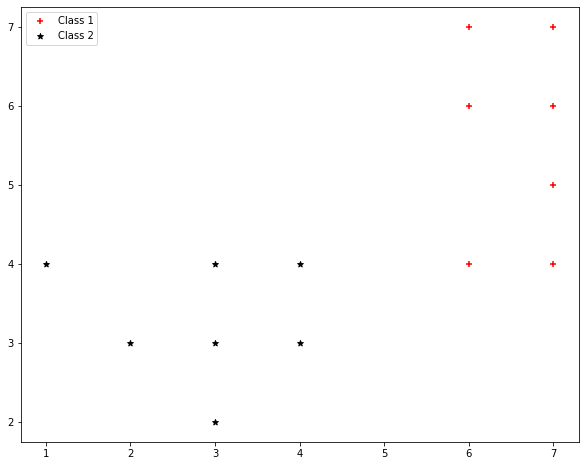

In [ ]:
plt.figure(figsize = (10, 8))

plt.scatter(x_train_1,y_train_1,marker='+',color='red',label='Class 1')
plt.scatter(x_train_2,y_train_2,marker='*',color='black',label='Class 2')

plt.legend()
plt.show()

# **Task 02**

In [ ]:
if(os.path.isfile("predictionTempFile.txt")):
    os.remove("predictionTempFile.txt")

def distance(x,y):
    return sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def KNNtemp(k,point):
    predictionTempFile=open('predictionTempFile.txt','a')
    best=[]
    predictionTempFile.write("{},{},".format(point[0],point[1]))
    cnt_class1=0
    cnt_class2=0
    for item in trainData:
        dis=distance(point,item)
        best.append((dis,item[2]))
    best.sort(key=lambda x:x[0])
    for i in range(k):        
        if(best[i][1]==1):
            cnt_class1+=1
        else:
            cnt_class2+=1
  
    if(cnt_class1>=cnt_class2):
        predictionTempFile.write("{}\n".format(1))  #class 1
    else:
        predictionTempFile.write("{}\n".format(2))  #class 2

    predictionTempFile.close()

In [ ]:
K=int(input('The value of K: '))  
for point in testData:
    KNNtemp(K,point)

The value of K: 3


In [ ]:
predictedData = np.loadtxt('predictionTempFile.txt',delimiter=",",dtype='int32')
print('predictedData:')
for x in predictedData:
    print("x = ",x[0],"y = ",x[1],"class = ",x[2])

predictedData:
x =  3 y =  7 class =  1
x =  7 y =  7 class =  1
x =  4 y =  3 class =  2
x =  2 y =  8 class =  2
x =  3 y =  5 class =  2
x =  1 y =  2 class =  2
x =  4 y =  8 class =  1
x =  8 y =  3 class =  1
x =  8 y =  4 class =  1


In [ ]:
#seperating class
train_class1=np.array([row for row in predictedData if row[2]==1])
train_class2=np.array([row for row in predictedData if row[2]==2])

#separating x, y
x_train_1=train_class1[:,0]
y_train_1=train_class1[:,1]
x_train_2=train_class2[:,0]
y_train_2=train_class2[:,1]

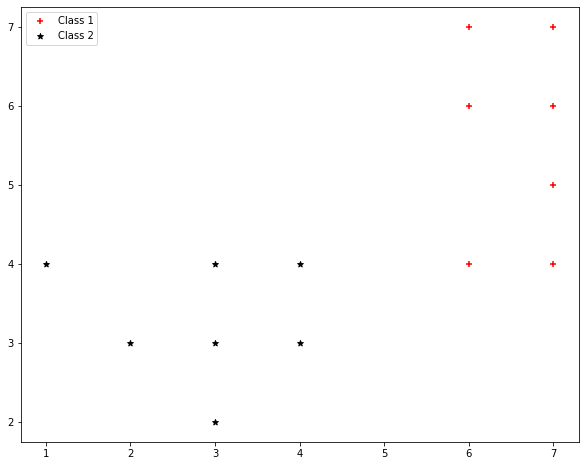

In [ ]:
plt.figure(figsize = (10, 8))

plt.scatter(x_train_1,y_train_1,marker='+',color='red',label='Class 1')
plt.scatter(x_train_2,y_train_2,marker='*',color='black',label='Class 2')

plt.legend()
plt.show()

if(os.path.isfile("predictionTempFile.txt")):
    os.remove("predictionTempFile.txt")

# **Task 03**

In [ ]:
if(os.path.isfile("prediction.txt")):
    os.remove("prediction.txt")

def distance(x,y):
    return sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def KNN(k,point):
    predictionFile=open('prediction.txt','a')
    best=[]
    predictionFile.write("Test Point: {},{}\n".format(point[0],point[1]))
    cnt_class1=0
    cnt_class2=0
    for item in trainData:
        dis=distance(point,item)
        best.append((dis,item[2]))
    best.sort(key=lambda x:x[0])
    for i in range(k):
        predictionFile.write("Distance {}: {:.2f} \t Class:{}\n".format(i+1,best[i][0],best[i][1]))
    for i in range(k):        
        if(best[i][1]==1):
            cnt_class1+=1
        else:
            cnt_class2+=1
  
    if(cnt_class1>=cnt_class2):
        predictionFile.write("Predicted Class {}\n".format(1))  #class 1
    else:
        predictionFile.write("Predicted Class {}\n".format(2))  #class 2
    predictionFile.write("\n")  
    predictionFile.close()    

In [ ]:
K=int(input('Enter K value:'))  
for point in testData:
    KNN(K,point)

Enter K value:3


In [ ]:
predictionFile = open("prediction.txt")
predictionFileContent = predictionFile.read()
predictionFile.close()    
print(predictionFileContent)

Test Point: 3,7
Distance 1: 3.00 	 Class:1
Distance 2: 3.00 	 Class:2
Distance 3: 3.16 	 Class:1
Predicted Class 1

Test Point: 7,7
Distance 1: 0.00 	 Class:1
Distance 2: 1.00 	 Class:1
Distance 3: 1.00 	 Class:1
Predicted Class 1

Test Point: 4,3
Distance 1: 0.00 	 Class:2
Distance 2: 1.00 	 Class:2
Distance 3: 1.00 	 Class:2
Predicted Class 2

Test Point: 2,8
Distance 1: 4.12 	 Class:1
Distance 2: 4.12 	 Class:2
Distance 3: 4.12 	 Class:2
Predicted Class 2

Test Point: 3,5
Distance 1: 1.00 	 Class:2
Distance 2: 1.41 	 Class:2
Distance 3: 2.00 	 Class:2
Predicted Class 2

Test Point: 1,2
Distance 1: 1.41 	 Class:2
Distance 2: 2.00 	 Class:2
Distance 3: 2.00 	 Class:2
Predicted Class 2

Test Point: 4,8
Distance 1: 2.24 	 Class:1
Distance 2: 2.83 	 Class:1
Distance 3: 3.16 	 Class:1
Predicted Class 1

Test Point: 8,3
Distance 1: 1.41 	 Class:1
Distance 2: 2.24 	 Class:1
Distance 3: 2.24 	 Class:1
Predicted Class 1

Test Point: 8,4
Distance 1: 1.00 	 Class:1
Distance 2: 1.41 	 Class:1
Di